In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None) # display all columns
data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34857,351,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34857,34009,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34857,NaN,NaN,NaN,3.03101,0.969933,1,2,3,4,16
Type,34857,3,h,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,27247,NaN,NaN,NaN,1.05017e+06,641467,85000,635000,870000,1.295e+06,1.12e+07
Method,34857,9,S,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34857,388,Jellis,3359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34857,78,28/10/2017,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34856,NaN,NaN,NaN,11.1849,6.78889,0,6.4,10.3,14,48.1
Postcode,34856,NaN,NaN,NaN,3116.06,109.024,3000,3051,3103,3156,3978


In [4]:
data.shape

(34857, 21)

I want first by using intuition to drop all the columns that are not relevant to the **price** including:
+ Lattitude
+ Longtitude

In [5]:
data.drop(columns=['Lattitude','Longtitude'], inplace=True)

# Data cleaning #

### - Distance ###

In [6]:
data.Distance.value_counts(dropna=False)

 11.2    1420
 13.8     681
 9.2      665
 7.8      662
 10.5     660
 8.4      604
 4.6      585
 14.7     566
 5.2      565
 11.4     521
 13.9     499
 9.7      470
 7.5      468
 6.4      459
 5.3      437
 13.0     427
 14.0     425
 6.2      403
 12.0     400
 16.7     394
 8.8      389
 7.7      384
 6.3      366
 20.6     356
 5.9      353
 12.1     350
 8.0      339
 17.9     338
 2.6      338
 7.0      333
         ... 
 47.4       7
 37.5       7
 39.0       7
 33.3       7
 29.9       7
 17.6       7
 48.1       6
 43.3       6
 3.7        6
 1.4        6
 43.4       5
 18.7       5
 31.6       4
 35.5       4
 30.4       3
 45.2       2
 23.6       2
 29.3       2
 20.1       2
 26.1       2
 34.6       2
 33.8       2
 39.8       2
NaN         1
 31.4       1
 32.6       1
 33.0       1
 22.9       1
 30.6       1
 29.5       1
Name: Distance, Length: 216, dtype: int64

There is only 1 missing value. The mode of this feature has significant counts. Hence, it is plausible to replace this missing value with the mode of this feature.

In [7]:
data.Distance.fillna(data.Distance.mode(), inplace=True)

### - Postcode ###

In [8]:
data[data.Postcode.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It occurs that this row has a lots of missing data. The solution is just drop this because it seems useless.

In [9]:
data.drop(index=29483, inplace=True)

In [10]:
data.reset_index().drop(columns='index', inplace=True)

In [11]:
data.iloc[29483]

Suburb                         Fawkner
Address                   1/1 Clara St
Rooms                                2
Type                                 u
Price                           412000
Method                               S
SellerG                            Ray
Date                         6/01/2018
Distance                          13.1
Postcode                          3060
Bedroom2                             2
Bathroom                             1
Car                                  1
Landsize                           NaN
BuildingArea                       NaN
YearBuilt                          NaN
CouncilArea          Hume City Council
Regionname       Northern Metropolitan
Propertycount                     5070
Name: 29484, dtype: object

### - Regionname ###

In [12]:
data.Regionname.value_counts(dropna=False)

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
NaN                               2
Name: Regionname, dtype: int64

In [13]:
data[data.Regionname.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It also shows that these two rows misses alot of features and we want to drop them as above.

In [14]:
data.drop(index=[18523, 26888], inplace=True)
data.reset_index().drop(columns='index', inplace=True)

We might want to take a look at the data again to see which columns need cleaning

In [15]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34854,350,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34854,34006,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34854,NaN,NaN,NaN,3.03107,0.969943,1,2,3,4,16
Type,34854,3,h,23978,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,27244,NaN,NaN,NaN,1.05021e+06,641492,85000,635000,870000,1.295e+06,1.12e+07
Method,34854,9,S,19743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34854,388,Jellis,3358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34854,78,28/10/2017,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34854,NaN,NaN,NaN,11.1852,6.78898,0,6.4,10.3,14,48.1
Postcode,34854,NaN,NaN,NaN,3116.07,109.026,3000,3051,3103,3156,3978


### - YearBuilt ###

In [16]:
data.YearBuilt[data.YearBuilt >= 2020].value_counts(dropna=False)

2106.0    1
Name: YearBuilt, dtype: int64

This is a typo and the possible data is 2016 instead of 2106.

In [17]:
data.YearBuilt.replace(2106, 2016, inplace=True)

In [18]:
data.YearBuilt.value_counts(dropna=False)

NaN        19303
 1970.0     1490
 1960.0     1260
 1950.0     1089
 1980.0      726
 1900.0      606
 2000.0      571
 1920.0      545
 1930.0      531
 1910.0      460
 1890.0      444
 1940.0      406
 1975.0      387
 2010.0      365
 1990.0      361
 2012.0      333
 2005.0      276
 1965.0      260
 2013.0      247
 2011.0      241
 2009.0      229
 1985.0      229
 1995.0      215
 2014.0      212
 2008.0      202
 2007.0      200
 1955.0      177
 1880.0      171
 1925.0      169
 2004.0      166
           ...  
 1898.0        3
 1932.0        2
 1881.0        2
 1921.0        2
 1931.0        2
 1854.0        2
 1872.0        2
 1901.0        2
 1894.0        2
 1857.0        2
 1909.0        2
 1899.0        2
 1855.0        1
 1871.0        1
 1869.0        1
 1884.0        1
 1896.0        1
 1897.0        1
 2019.0        1
 1942.0        1
 1876.0        1
 1868.0        1
 1800.0        1
 1856.0        1
 1883.0        1
 1196.0        1
 1820.0        1
 1862.0       

This feature has too maning NaNs. I will drop this column.

In [19]:
data.drop(columns='YearBuilt', inplace=True)

### - BuildingArea ###

In [20]:
data.BuildingArea.value_counts(dropna=False)

NaN         21112
 120.00       185
 100.00       161
 110.00       159
 130.00       153
 115.00       149
 140.00       142
 150.00       136
 160.00       123
 112.00       123
 125.00       119
 105.00       110
 180.00       110
 145.00       102
 108.00       101
 104.00       101
 90.00        100
 102.00       100
 80.00        100
 132.00        99
 135.00        99
 133.00        98
 170.00        96
 95.00         95
 118.00        94
 123.00        94
 138.00        93
 85.00         92
 106.00        92
 103.00        91
            ...  
 463.00         1
 272.40         1
 81.79          1
 438.00         1
 391.00         1
 195.30         1
 603.00         1
 607.00         1
 474.00         1
 446.00         1
 165.50         1
 98.50          1
 122.60         1
 30.60          1
 116.65         1
 664.00         1
 528.00         1
 89.25          1
 69.50          1
 63.40          1
 126.70         1
 92.50          1
 105.90         1
 511.00         1
 157.85   

This feature also misses a lot of data. But this is a very important feature as a guess, I cannot drop this column. Instead, I will drop all of the missing rows.

In [21]:
data = data[pd.notnull(data['BuildingArea'])]

In [22]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,13742,326,Reservoir,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,13742,13489,25 William St,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,13742,NaN,NaN,NaN,3.14838,0.973653,1,3,3,4,12
Type,13742,3,h,10413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10656,NaN,NaN,NaN,1.08705e+06,677176,131000,640000,892500,1.33e+06,9e+06
Method,13742,9,S,7645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,13742,296,Nelson,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,13742,78,28/10/2017,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,13742,NaN,NaN,NaN,11.3553,7.10097,0,6.4,10.2,14.2,48.1
Postcode,13742,NaN,NaN,NaN,3118.02,119.69,3000,3046,3101,3156,3978


We dropped alot of data but an amount of the other NaNs has been removed as well.

### - Landsize ###

In [23]:
data.Landsize.value_counts(dropna=False)

NaN         1602
 0.0        1327
 650.0        94
 697.0        53
 700.0        47
 534.0        45
 400.0        42
 585.0        42
 604.0        41
 600.0        37
 448.0        36
 696.0        34
 652.0        34
 660.0        33
 695.0        32
 580.0        32
 613.0        32
 557.0        31
 581.0        30
 590.0        30
 651.0        30
 530.0        30
 653.0        30
 630.0        28
 602.0        28
 603.0        28
 589.0        28
 612.0        28
 531.0        27
 605.0        27
            ... 
 38.0          1
 1081.0        1
 1826.0        1
 1383.0        1
 6996.0        1
 1231.0        1
 1160.0        1
 1503.0        1
 1389.0        1
 3256.0        1
 3957.0        1
 1075.0        1
 1166.0        1
 985.0         1
 1153.0        1
 4421.0        1
 1473.0        1
 1784.0        1
 4292.0        1
 2033.0        1
 10590.0       1
 5661.0        1
 1048.0        1
 3826.0        1
 5022.0        1
 972.0         1
 1446.0        1
 2064.0       

According to the data, we might guess the NaNs data can be replaced with the mode = 0, implying the house only have building area which also makes sense.

In [24]:
data.Landsize.fillna(value=0, inplace=True) # using mode() does not work -> resort to hardcode value 0

### - Car ###

In [25]:
data.Car.value_counts(dropna=False)

 2.0     6347
 1.0     4778
 0.0      823
 3.0      813
 4.0      563
NaN       232
 6.0       81
 5.0       76
 7.0       12
 8.0       10
 9.0        2
 10.0       2
 26.0       1
 11.0       1
 12.0       1
Name: Car, dtype: int64

In this case, it makes sense to replace the NaNs with 0.

In [26]:
data.Car.fillna(value=0, inplace=True)

### - Price ###

This feature is important as it is the output of the upcoming regression model. To train the model, we need all of its data, and the NaNs can be replaced with anything. But at the cost of droping all of the NaNs rows in price, we might miss out on data. Hence, I suggest creating another dataframe for regression while using the old dataframe for data exploration.

In [28]:
import copy
data_regr = copy.copy(data[pd.notnull(data['Price'])])

In [29]:
data_regr.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,10656,324,Reservoir,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,10656,10498,36 Aberfeldie St,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,10656,NaN,NaN,NaN,3.10717,0.960389,1,3,3,4,12
Type,10656,3,h,7943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10656,NaN,NaN,NaN,1.08705e+06,677176,131000,640000,892500,1.33e+06,9e+06
Method,10656,5,S,6741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,10656,268,Nelson,1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,10656,77,28/10/2017,331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,10656,NaN,NaN,NaN,11.491,7.12924,0,6.4,10.4,14.3,48.1
Postcode,10656,NaN,NaN,NaN,3115.64,122.201,3000,3044,3084,3153,3978


I want to check out other columns to see if there is any problems in the data

In [30]:
data.Rooms.value_counts()

3     5844
4     3603
2     2794
5      895
1      483
6      100
7       15
8        6
12       1
10       1
Name: Rooms, dtype: int64

In [31]:
data.Type.value_counts()

h    10413
u     2197
t     1132
Name: Type, dtype: int64

In [32]:
data.Method.value_counts()

S     7645
SP    2167
PI    1888
VB    1171
SN     568
PN     136
SA      86
W       72
SS       9
Name: Method, dtype: int64

In [33]:
data.CouncilArea.value_counts()

Boroondara City Council           1390
Darebin City Council              1040
Moreland City Council              888
Melbourne City Council             764
Glen Eira City Council             745
Moonee Valley City Council         713
Maribyrnong City Council           669
Banyule City Council               649
Bayside City Council               625
Brimbank City Council              601
Hume City Council                  577
Monash City Council                528
Stonnington City Council           523
Port Phillip City Council          513
Yarra City Council                 502
Hobsons Bay City Council           409
Manningham City Council            385
Whittlesea City Council            373
Kingston City Council              320
Wyndham City Council               301
Whitehorse City Council            222
Maroondah City Council             209
Melton City Council                170
Knox City Council                  159
Frankston City Council             141
Greater Dandenong City Co

 # Data Exploration #

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13742.0,3.148377e+00,0.973653,1.0,3.0,3.0,4.0,12.0
Price,10656.0,1.087051e+06,677176.114541,131000.0,640000.0,892500.0,1330000.0,9000000.0
Distance,13742.0,1.135528e+01,7.100975,0.0,6.4,10.2,14.2,48.1
Postcode,13742.0,3.118025e+03,119.690350,3000.0,3046.0,3101.0,3156.0,3978.0
Bedroom2,13742.0,3.126255e+00,0.975127,0.0,3.0,3.0,4.0,12.0
Bathroom,13742.0,1.691239e+00,0.737851,1.0,1.0,2.0,2.0,9.0
Car,13742.0,1.694077e+00,1.023695,0.0,1.0,2.0,2.0,26.0
Landsize,13742.0,4.689059e+02,1080.857514,0.0,126.0,396.5,641.0,44500.0
BuildingArea,13742.0,1.602564e+02,401.267060,0.0,102.0,136.0,188.0,44515.0
Propertycount,13742.0,7.485790e+03,4314.543625,129.0,4387.0,6567.0,10331.0,21650.0


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='grade3')

In [36]:
corr = data[['Rooms', 'Price', 'Distance', 
             'Postcode', 'Bedroom2', 'Bathroom', 
             'Car', 'Landsize', 'BuildingArea', 'Propertycount']].corr()

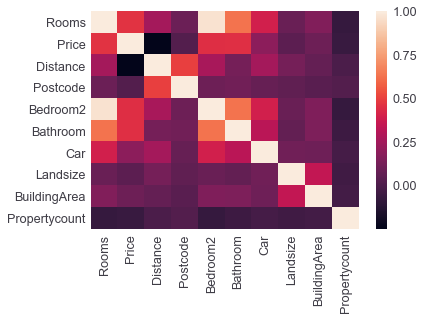

In [37]:
sns.heatmap(corr)

Looking at the correlation heatmap, we see that:
+ **Bedroom2** and **Rooms** have very strong correlation (near to 1)
+ **Bathroom** and **Rooms** also have decent correlation

In [38]:
data[['Rooms','Bedroom2','Bathroom','Price']].corr()

,Rooms,Bedroom2,Bathroom,Price
Rooms,1.000000,0.967836,0.631764,0.464425
Bedroom2,0.967836,1.000000,0.630417,0.451667
Bathroom,0.631764,0.630417,1.000000,0.455924
Price,0.464425,0.451667,0.455924,1.000000


We want a closer look in the correlation matrix of these specific features. Because **Rooms** and **Bedroom2** has near 1 correlation value, we should remove one of them to reduce the dimension. According to the matrix, we choose **Rooms** to keep because it has higher correlation value with **Price**

Among the features, the number of rooms have very high correlation with **Price** but not the **Landsize**.

In [39]:
data.drop(columns='Bedroom2', inplace=True)

In [41]:
data_regr.drop(columns='Bedroom2', inplace=True)

In [44]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,13742,326,Reservoir,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,13742,13489,25 William St,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,13742,NaN,NaN,NaN,3.14838,0.973653,1,3,3,4,12
Type,13742,3,h,10413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10656,NaN,NaN,NaN,1.08705e+06,677176,131000,640000,892500,1.33e+06,9e+06
Method,13742,9,S,7645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,13742,296,Nelson,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,13742,78,28/10/2017,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,13742,NaN,NaN,NaN,11.3553,7.10097,0,6.4,10.2,14.2,48.1
Postcode,13742,NaN,NaN,NaN,3118.02,119.69,3000,3046,3101,3156,3978


In [45]:
#TODO: Date, methode, type

# Regression #

In [46]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error